In [266]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [362]:
# Read the data from the text file
df = pd.read_csv('chainAB_contacts_5UH5', delimiter='\s+', skiprows=1, header=None, names=['protein-A', 'protein-B', 'distance', 'possible_interaction_forces'])
df = df.drop([0]).reset_index(drop=True)
# df = df_file[df_file['possible_interaction_forces'] == 'induction']

# print(df)



new_A, new_B = [],[]
for i in df['protein-A']: new_A.append("A_"+str(i))
for i in df['protein-B']: new_B.append("B_"+str(i))
df['protein-A'] = new_A
df['protein-B'] = new_B
df['nodes'] = [tuple(x) for x in df[['protein-A', 'protein-B']].to_numpy()]
list_interactions = df['possible_interaction_forces'].unique()
colors_1 = [ 'tan', 'skyblue', 'tomato', 'teal', 'violet', 'silver', 'sandybrown','yellow']
color_dict = {element: color for element, color in zip(list_interactions, colors_1)}
color_list = [color_dict[element] for element in df['possible_interaction_forces']]
df['colors'] = color_list
df['edge'] = [1]*len(df['nodes'])

print(df)
print(df['colors'].to_list())

     protein-A  protein-B distance possible_interaction_forces  \
0      A_ILE:3  B_GLU:141    3.581                   induction   
1      A_ILE:3  B_ARG:142    3.271                   induction   
2      A_ILE:3  B_GLY:143    4.844                hydrophobic,   
3      A_ILE:3  B_VAL:147    4.322                hydrophobic,   
4      A_ILE:3  B_TYR:168    3.557                hydrophobic,   
..         ...        ...      ...                         ...   
110  A_ALA:222  B_GLY:212    4.006                hydrophobic,   
111  A_ARG:223  B_ALA:209     4.68                   induction   
112  A_ARG:223  B_GLY:212     3.12                   induction   
113  A_ARG:223  B_LYS:213    3.367                       ionic   
114  A_ARG:223  B_VAL:216     3.09                   induction   

                      nodes      colors  edge  
0      (A_ILE:3, B_GLU:141)         tan     1  
1      (A_ILE:3, B_ARG:142)         tan     1  
2      (A_ILE:3, B_GLY:143)     skyblue     1  
3      (A_ILE:3

In [363]:
df

,protein-A,protein-B,distance,possible_interaction_forces,nodes,colors,edge
0,A_ILE:3,B_GLU:141,3.581,induction,"(A_ILE:3, B_GLU:141)",tan,1
1,A_ILE:3,B_ARG:142,3.271,induction,"(A_ILE:3, B_ARG:142)",tan,1
2,A_ILE:3,B_GLY:143,4.844,"hydrophobic,","(A_ILE:3, B_GLY:143)",skyblue,1
3,A_ILE:3,B_VAL:147,4.322,"hydrophobic,","(A_ILE:3, B_VAL:147)",skyblue,1
4,A_ILE:3,B_TYR:168,3.557,"hydrophobic,","(A_ILE:3, B_TYR:168)",skyblue,1
...,...,...,...,...,...,...,...
110,A_ALA:222,B_GLY:212,4.006,"hydrophobic,","(A_ALA:222, B_GLY:212)",skyblue,1
111,A_ARG:223,B_ALA:209,4.68,induction,"(A_ARG:223, B_ALA:209)",tan,1
112,A_ARG:223,B_GLY:212,3.12,induction,"(A_ARG:223, B_GLY:212)",tan,1
113,A_ARG:223,B_LYS:213,3.367,ionic,"(A_ARG:223, B_LYS:213)",sandybrown,1


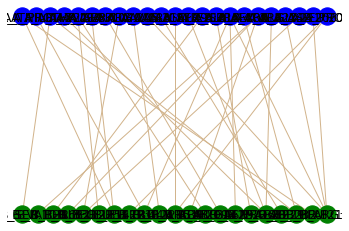

In [299]:
G = nx.Graph()

proteinA_nodes = list(df['protein-A'].unique())
proteinB_nodes = list(df['protein-B'].unique())
edge_list = list(df['nodes'])

G.add_nodes_from(proteinA_nodes, bipartite=0)
G.add_nodes_from(proteinB_nodes, bipartite=1)

G.add_edges_from(df['nodes'])

#pos = nx.bipartite_layout(G, proteinA_nodes)
pos = nx.bipartite_layout(G, proteinA_nodes, align='horizontal')

nx.draw_networkx_nodes(G, pos, nodelist=proteinA_nodes, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=proteinB_nodes, node_color='g')
#nx.draw_networkx_edges(G, pos, edgelist=edge_list, width=1)
nx.draw_networkx_edges(G, pos, edgelist=edge_list, width=1, edge_color=df['colors'])
nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()})

plt.axis('off')
plt.show()


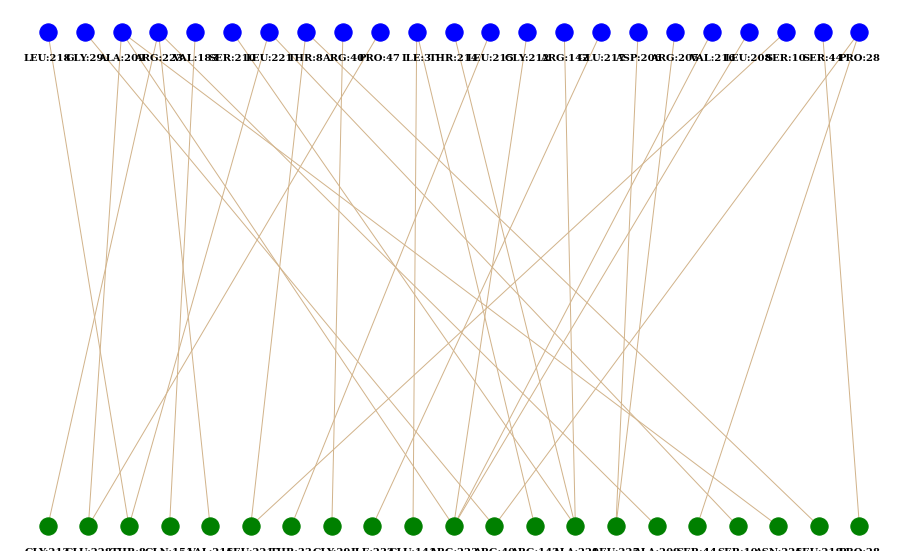

In [249]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

proteinA_nodes = list(df['protein-A'].unique())
proteinB_nodes = list(df['protein-B'].unique())
edge_list = list(df['nodes'])

G.add_nodes_from(proteinA_nodes, bipartite=0)
G.add_nodes_from(proteinB_nodes, bipartite=1)

G.add_edges_from(df['nodes'])

pos = nx.bipartite_layout(G, proteinA_nodes, align='horizontal')

fig, ax = plt.subplots(figsize=(16, 10))
nx.draw_networkx_nodes(G, pos, nodelist=proteinA_nodes, node_color='b', ax=ax)
nx.draw_networkx_nodes(G, pos, nodelist=proteinB_nodes, node_color='g', ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=edge_list, width=1, edge_color=df['colors'], ax=ax)
node_labels = {node: node.split('_')[1] for node in G.nodes()}
node_label_pos = {node: pos[node] + (0, -0.08) for node in G.nodes()}
nx.draw_networkx_labels(G, pos=node_label_pos, labels=node_labels, font_size=10, font_family='serif', font_weight='bold', ax=ax)
ax.set_axis_off()
plt.savefig('network_plot.png', dpi=300, bbox_inches='tight')
plt.show()



In [250]:
import plotly.graph_objects as go
import networkx as nx
import pandas as pd
import matplotlib.colors as colors

# Load data into a pandas DataFrame
#df = pd.read_csv('data.csv')

# Create the bipartite graph
# Create the bipartite graph
# Create the bipartite graph
G = nx.Graph()
proteinA_nodes = list(df['protein-A'].unique())
proteinB_nodes = list(df['protein-B'].unique())
edge_list = list(df['nodes'])

G.add_nodes_from(proteinA_nodes, bipartite=0)
G.add_nodes_from(proteinB_nodes, bipartite=1)
G.add_edges_from(edge_list)

# Create node and edge traces
node_trace = go.Scatter(x=[], y=[], text=[], mode='markers+text', textposition='top center',
                        marker=dict(symbol='circle', size=25, color=[], colorscale='Blues', line=dict(width=1, color='black')))
edge_trace = go.Scatter(x=[], y=[], line=dict(width=1, color='gray'))

# Add positions to the node trace
pos = nx.bipartite_layout(G, proteinA_nodes, align='horizontal')
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['text'] += tuple([node.split('_')[1]])
    node_trace['marker']['color'] += tuple([0 if G.nodes[node]['bipartite'] == 0 else 1])

# Add positions to the edge trace
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    interaction_color = colors.to_rgba(df.loc[(df['protein-A'] == edge[0]) & (df['protein-B'] == edge[1]), 'colors'].item())
    edge_trace['line']['color'] += tuple([interaction_color])

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title='Bipartite Graph', showlegend=False, hovermode='closest',
                                 xaxis=dict(showticklabels=False, zeroline=False, showgrid=False),
                                 yaxis=dict(showticklabels=False, zeroline=False, showgrid=False)))

# Update the margins and plot the figure
fig.update_layout(margin=dict(b=20, l=5, r=5, t=40))
fig.show()

TypeError: can only concatenate str (not "tuple") to str

In [374]:
import plotly.graph_objects as go
import networkx as nx
import pandas as pd
import matplotlib.colors as colors

# Load data into a pandas DataFrame
#df = pd.read_csv('data.csv')
#df['colors'] = df['colors'].apply(lambda x: tuple(colors.to_rgba(x)))  # convert color names to RGBA tuples

# Create the bipartite graph
G = nx.Graph()
proteinA_nodes = list(df['protein-A'].unique())
proteinB_nodes = list(df['protein-B'].unique())
# edge_list = list(df['nodes'])

G.add_nodes_from(proteinA_nodes, bipartite=0)
G.add_nodes_from(proteinB_nodes, bipartite=1)
# G.add_edges_from(edge_list)

# Create node and edge traces
node_trace = go.Scatter(x=[], y=[], text=[], mode='markers+text', textposition='middle center', textfont_color='red',
                        marker=dict(symbol='circle', size=25, color=[], colorscale='Blues'))
# edge_trace = go.Scatter(x=[], y=[], mode='lines', line=dict(width=2, color='tan'))

data_plot = [node_trace]

# Add positions to the node trace
pos = nx.bipartite_layout(G, proteinA_nodes, align='horizontal')
for node in G.nodes():
    # print(node)
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['text'] += tuple([node.split('_')[1]])
    node_trace['marker']['color'] += tuple([0 if G.nodes[node]['bipartite'] == 0 else 1])

w=1
for interac in colors_1:
    
    print(interac)
    
    edge_list = list(df[df['colors']==interac]['nodes'])
    # print(edge_list)


    # edge_list = list(df['nodes'])
    G.add_edges_from(edge_list)

    edge_trace = go.Scatter(x=[], y=[], mode='lines', line=dict(width=w, color=interac))

    # Add positions to the edge trace
    for edge in G.edges():
        # print(edge)
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace['x'] += tuple([x0, x0])
        edge_trace['y'] += tuple([y0, y1])
        # interaction_color = df.loc[(df['protein-A'] == edge[0]) & (df['protein-B'] == edge[1]), 'colors'].item()
        # edge_trace['line']['color'] += df.loc[(df['protein-A'] == edge[0]) & (df['protein-B'] == edge[1]), 'colors'].item()

    data_plot.insert(0,edge_trace)
    w+=0.5
# Create the figure
fig = go.Figure(data=data_plot,
                layout=go.Layout(title='Bipartite Graph', showlegend=False,
                                 xaxis=dict(showticklabels=False, zeroline=False, showgrid=False),
                                 yaxis=dict(showticklabels=False, zeroline=False, showgrid=False)))

# Update the margins and plot the figure
fig.update_layout(margin=dict(b=10, l=5, r=5, t=40))
fig.show()



tan
skyblue
tomato
teal
violet
silver
sandybrown
yellow


In [372]:
# Create a dictionary that maps each unique interaction type to a color
list_interactions = df['possible_interaction_forces'].unique()
colors = ['yellow', 'tan', 'skyblue', 'tomato', 'teal', 'violet', 'silver', 'sandybrown']
color_dict = {element: color for element, color in zip(list_interactions, colors)}

# Create the edge trace with color sequence based on interaction type
edge_trace = go.Scatter(x=[], y=[], line=dict(width=1, color=[]))
for i in range(len(df)):
    source_node, target_node, interaction_type = df.loc[i, ['protein-A', 'protein-B', 'possible_interaction_forces']]
    edge_trace['x'] += tuple([pos[source_node][0], pos[target_node][0], None])
    edge_trace['y'] += tuple([pos[source_node][1], pos[target_node][1], None])
    edge_trace['line']['color'] += tuple([color_dict[interaction_type]])

# Add the legend
legend_items = []
for interaction_type, color in color_dict.items():
    legend_items.append(dict(trace=0, name=interaction_type, marker=dict(color=color)))
fig.update_layout(legend=dict(items=legend_items))


ValueError: 
    Invalid value of type 'builtins.list' received for the 'color' property of scatter.line
        Received value: []

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [238]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=1, color=df['colors'])
)

ValueError: 
    Invalid value of type 'pandas.core.series.Series' received for the 'color' property of scatter.line
        Received value: 0                                   (1.0, 1.0, 0.0, 1.0)
1                                   (1.0, 1.0, 0.0, 1.0)
2      (0.8235294117647058, 0.7058823529411765, 0.549...
3      (0.8235294117647058, 0.7058823529411765, 0.549...
4      (0.8235294117647058, 0.7058823529411765, 0.549...
                             ...                        
110    (0.8235294117647058, 0.7058823529411765, 0.549...
111                                 (1.0, 1.0, 0.0, 1.0)
112                                 (1.0, 1.0, 0.0, 1.0)
113    (0.7529411764705882, 0.7529411764705882, 0.752...
114                                 (1.0, 1.0, 0.0, 1.0)
Name: colors, Length: 115, dtype: object

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [161]:
import plotly.graph_objects as go
import numpy as np

# Define node sets
proteinA_nodes = list(df['protein-A'].unique())
proteinB_nodes = list(df['protein-B'].unique())

# Combine node sets for labeling
labels_A = proteinA_nodes
labels_B = proteinB_nodes

# Convert graph to adjacency matrix
adj_matrix = np.matrix(nx.to_numpy_matrix(G))

# Define axis labels
#x_labels = labels
#y_labels = labels[::-1]

# Create heatmap trace
trace = go.Heatmap(z=adj_matrix, x=labels_A, y=labels_B)

# Define layout
layout = go.Layout(
    title='Protein Interaction Network',
    xaxis=dict(title='Proteins', side='bottom', tickangle=-45),
    yaxis=dict(title='Proteins', autorange='reversed'),
)

# Create figure and plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [239]:
df['possible_interaction_forces'] 

0         induction
1         induction
2      hydrophobic,
3      hydrophobic,
4      hydrophobic,
           ...     
110    hydrophobic,
111       induction
112       induction
113           ionic
114       induction
Name: possible_interaction_forces, Length: 115, dtype: object

In [155]:
import plotly.graph_objects as go

# Define the interaction types and corresponding colors
interaction_colors = {
    'induction + dispersion': 'blue',
    'hydrophobic': 'green',
    'electrostatic: ion-dipole,hydrogen bond': 'red',
    'salt bridge,hydrogen bond': 'orange',
    'dipole-π stacking': 'purple',
    'cation-π stacking': 'brown'
}

# Define the residue numbers for the x and y axes
residue_numbers = [str(i) for i in range(1, 222)]

# Create a 2D array to store the interaction type for each residue pair
interaction_types = [['' for i in range(len(residue_numbers))] for j in range(len(residue_numbers))]

# Add the interaction types to the interaction_types array
for _, row in df.iterrows():
    print(row)

    res_a, res_b, _, interaction = row
    res_a_num = int(res_a.split(':')[1]) - 1
    res_b_num = int(res_b.split(':')[1]) - 1
    interaction_types[res_a_num][res_b_num] = interaction_colors[interaction]
    interaction_types[res_b_num][res_a_num] = interaction_colors[interaction]

# Create the heatmap trace
trace = go.Heatmap(z=interaction_types, x=residue_numbers, y=residue_numbers, colorscale=list(interaction_colors.values()))

# Set the layout
layout = go.Layout(
    title='Contact Map for Protein Chain A - Chain B (5uH5)',
    xaxis=dict(title='Residue Number'),
    yaxis=dict(title='Residue Number', autorange='reversed')
)

# Create the figure and plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()


protein-A                                 ILE:3
protein-B                               GLU:141
distance                                  3.581
possible_interaction_forces           induction
nodes                          (ILE:3, GLU:141)
edge                                          1
Name: 0, dtype: object


ValueError: too many values to unpack (expected 4)

In [297]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

import networkx as nx
import pandas as pd
import plotly.graph_objs as go

# Read the data from the text file
#df = pd.read_csv('chainAB_contacts_5UH5', delimiter='\s+', skiprows=1, header=None, names=['protein-A', 'protein-B', 'distance', 'possible_interaction_forces'])

# create edge trace
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=3, color='#888'),
    hoverinfo='none',
    mode='lines')
# create node trace for B
node_x_b = []
node_y_b = []
node_text_b = []
for node in df['protein-B'].unique():
    x, y = pos[node]
    node_x_b.append(x)
    node_y_b.append(y)
    node_text_b.append(node.split(":")[1])

node_trace_b = go.Scatter(
    x=node_x_b, y=node_y_b,
    mode='markers+text',
    text=node_text_b,
    textposition='bottom center',
    marker=dict(symbol='circle', size=20, color='#ff7f0e'),
    hoverinfo='none')

# create node trace for A
node_x_a = []
node_y_a = []
node_text_a = []
for node in df['protein-A'].unique():
    x, y = pos[node]
    node_x_a.append(x)
    node_y_a.append(y)
    node_text_a.append(node.split(":")[1])

node_trace_a = go.Scatter(
    x=node_x_a, y=node_y_a,
    mode='markers+text',
    text=node_text_a,
    textposition='top center',
    marker=dict(symbol='circle', size=20, color='#1f77b4'),
    hoverinfo='none')



# create figure
fig = go.Figure(data=[edge_trace, node_trace_a, node_trace_b],
                layout=go.Layout(
                    #title='<br>Bipartite graph of protein interactions',
                    #titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=2, l=1, r=1, t=1),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    plot_bgcolor='white'))

fig.show()


In [276]:
for node in df['protein-A'].unique():
    x, y = pos[node]
    node_x_a.append(x)
    node_y_a.append(y)
    print(node.strip())
    node_text_a.append(node)

SyntaxError: invalid syntax (<ipython-input-276-d28c8db895b1>, line 5)

In [288]:
node.split(":")[1]

'223'

In [265]:
i

'VAL:216'